In [48]:
import pandas as pd
import seaborn as sns
import torch
import numpy as np

In [60]:
def smooth(row, radius):
    """
    Computes the moving average over the given row of data. Returns an array of the same shape as the original row.
    """
    y = np.ones(radius)
    z = np.ones(len(row))
    return np.convolve(row, y, 'same') / np.convolve(z, y, 'same')

In [61]:
df = pd.read_csv('storage/RGCN_8x32_ROOT_SHARED_Until_1_2_1_1_PointLtl2-v0_seed:1_epochs:10_bs:2048_fpp:4096_dsc:0.998_lr:0.0003_ent:0.003_clip:0.2_prog:full/train/log.csv')
df['return_smooth'] = smooth(df['return_mean'], 10)

In [81]:
mask = df['frames'] <= 500000
df.loc[mask, 'return_smooth'] /= 2

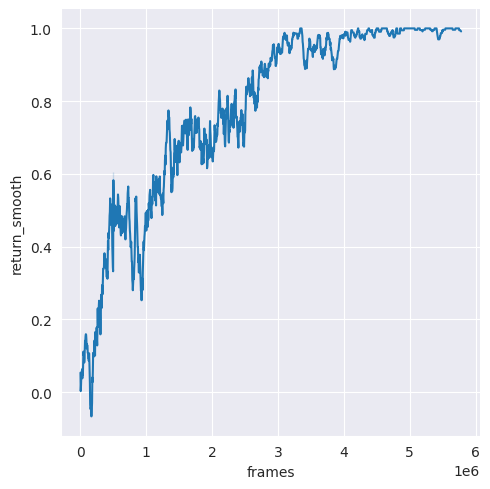

In [83]:
p = sns.relplot(df, x='frames', y='return_smooth', kind='line', )

In [84]:
p.figure.savefig('/home/mathias/tmp/ltl2action.pdf')